In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

>Get the data using the pandas library

In [2]:
train=pd.read_csv(r"C:\Users\ninjaac\Desktop\python\sentimarnt analysis\train_tweet.csv",encoding='latin1')
test=pd.read_csv(r"C:\Users\ninjaac\Desktop\python\sentimarnt analysis\test_tweet.csv",encoding='latin1')


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


###### get the decribtion of all the columns in the dataset.
###### ex.count of the all columns 

In [4]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
train.keys()

Index(['id', 'label', 'tweet'], dtype='object')

In [6]:
print(train.shape) 
test.shape 

(31962, 3)


(17197, 2)

###### drop is there any null samplrs in the dataset

In [7]:
train=train.dropna(how='any',axis=0)
test=test.dropna(how='any',axis=0)

###### value count
   number of datas in the each of the class
   exa.29720 samples in the class 0 means pasitive commands

In [8]:
train['label'].value_counts()


0    29720
1     2242
Name: label, dtype: int64

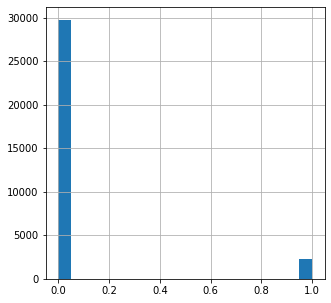

In [9]:
train['label'].hist(bins=20,figsize=(5,5))
plt.show()

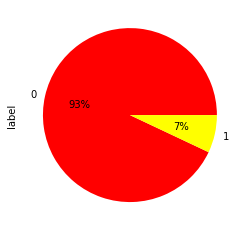

In [10]:
train.label.value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['red','yellow'])


In [11]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

In [12]:
#clean the data
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


###### cleaning the data
    >>remove all the special charecters and numbers in the dataset using the 
      re library python
    >>finally remove all multispaces to single space

In [13]:
def clean_text(data,lenth,start,end):
    corpus=[]
    for i in range(start,end):
        #covert all to lower case letter
        tweet=data['tweet'][i].lower()

        #remove all the special charecter from the data
        tweet=re.sub(r'\W',' ',tweet)
        
        #remove the ... from the data
        tweet=re.sub('[0-9]','',tweet)

        
        #remove all singel charecter in the tweet
        tweet=re.sub(r'\s+[A-Za-z]\s+',' ',tweet)
        
        #remove the smily charecter
        tweet=re.sub('[^A-Za-z]',' ',tweet)

        #remove all multispaces with single space
        tweet=re.sub(r'\s+',' ',tweet)
        

        corpus.append(tweet)
        
    return corpus

###### stemming
>set all words to their root meaning words
>>ex.loves and loved to the root word love


In [14]:
#do stemping exaple likes and likess are converted to like only
def stemping(data):
    stemped=[]
    for i in range(0,len(data)):
        tweet=data[i]
        tweet=tweet.split()
        #create the posterstemmer object
        ps=PorterStemmer()
        #stwmping and remove the stopwords
        tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]

        #join the stemped words
        
        tweet = ' '.join(tweet)
        stemped.append(tweet)
        
    return stemped

In [15]:
#cleaning the data
train_cleaned=clean_text(train,15000,0,15000)
val_cleaned=clean_text(train,15000,15000,30000)
test_cleaned=clean_text(test,8000,0,5000)


In [22]:
#stemming
train_stemped=stemping(train_cleaned)
val_stemping=stemping(val_cleaned)
test_stmped=stemping(test_cleaned)


###### CountVectorozetion
>it will generate a dataset columns with all the words in the data and rows
    filled with the ferequncy of the word in the datset

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
def countvector(m,n,train_data,test_data,val_data):

    feature_names=[]
    cv=CountVectorizer(min_df=1,max_features=m,ngram_range=(1,n),lowercase=False)
    train_vect=cv.fit_transform(train_data).toarray()
    val_vect=cv.fit_transform(val_data).toarray()
    test_vect=cv.fit_transform(test_data).toarray()
    
    feature_names.append(cv.get_feature_names())
    return train_vect,val_vect,test_vect,feature_names



In [ ]:
def uploadFiles(train_vect,val_vect,test_vect): 
    pd.DataFrame(train_vect).to_csv(r'C:\Users\ninjaac\Desktop\python\sentimarnt analysis\train_vect.csv')
    pd.DataFrame(val_vect).to_csv(r'C:\Users\ninjaac\Desktop\python\sentimarnt analysis\val_vect.csv')
    pd.DataFrame(test_vect).to_csv(r'C:\Users\ninjaac\Desktop\python\sentimarnt analysis\test_vect.csv')


In [17]:
#countvectorizing the datas
train_vect,val_vect,test_vect,fearture_names=countvector(4000,2,train_cleaned,test_cleaned,val_cleaned)


In [ ]:
#upload files
uploadFiles(train_vect,val_vect,test_vect)


###### split the data into train,validation,test sets

In [18]:
#split train and test acording to the data
X_train = train_vect
y_train= train.iloc[0:15000, 1].values
X_val=val_vect
y_val=train.iloc[15000:30000,1].values
X_test = test_vect
y_test= test.iloc[0:8000, 1].values


###### RandomForest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(n_estimators=30,n_jobs=-1,random_state=0)

In [ ]:
ran.fit(X_train,y_train)

In [ ]:
y_pred=ran.predict(X_val)

In [ ]:
#accuracy score for randomForestClassifier
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

In [ ]:
accuracy_score(y_val, y_pred,normalize=False)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_val,y_pred)

##### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

#grid search method for classification 
from sklearn.model_selection import GridSearchCV
parameters=[{'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]},{'kernel':['linear'],'C':[1,10,100,1000]}]

grid=GridSearchCV(SVC(),parameters,cv=5,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
#feature details
print(f"the best parameters{grid.best_params_}")

print(f"the best scores{grid.best_score_}")

print(f"the grid search results{grid.cv_results_}")

##### KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_val)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_KNN=confusion_matrix(y_test,y_pred_knn)
